In [1]:
import os
import cv2
from shutil import copyfile
from tqdm import tqdm

So basically we want to change the aspect ratio of our images to 16:9 because that's what the camera image is at

In [2]:
BG_DIR = "backgrounds"
OUT_DIR = os.path.join("backgrounds", "resize")

# Load our background paths
bg_paths = [x for x in os.listdir(BG_DIR) if os.path.splitext(x)[1] == ".jpg"]

TARGET_RATIO = 16/9

for bg_path in tqdm(bg_paths):
    bg = cv2.imread(os.path.join(BG_DIR, bg_path))
    h, w = bg.shape[:2]
    
    # Rotate image 90 degrees clockwise if width is less than height
    if w < h:
        bg=cv2.rotate(bg, cv2.ROTATE_90_CLOCKWISE) 
        
    # Find ratio of our image
    bg_ratio = w/h
    
    if round(bg_ratio, 1) == round(TARGET_RATIO, 1):
        copyfile(os.path.join(BG_DIR, bg_path), os.path.join(OUT_DIR, bg_path))
        continue
    
    if bg_ratio > TARGET_RATIO:
        new_h = int(w/TARGET_RATIO)
        
        # ignore images under 512 pixels in height
        if new_h < 512:
            continue
        bg = cv2.resize(bg, (w, new_h), interpolation=cv2.INTER_CUBIC)
    if bg_ratio < TARGET_RATIO:
        # ignore images under 512 pixels in height
        if h < 512:
            continue
        new_w = int(h*TARGET_RATIO)
        bg = cv2.resize(bg, (new_w, h), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(OUT_DIR, bg_path), bg)        
print("done!")

100%|██████████| 20833/20833 [02:09<00:00, 161.45it/s]

done!


Now that everything is a 16:9 aspect ratio, let's explore our distribution of image sizes

In [3]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:

bg_paths = [os.path.join(BG_DIR, x) for x in os.listdir(BG_DIR) if os.path.splitext(x)[1] == ".jpg"]
bg_widths = np.array([cv2.imread(x, 0).shape[1] for x in bg_paths])
print(len(bg_widths))



20833


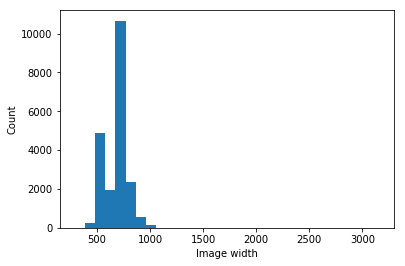

In [5]:
plt.hist(bg_widths, bins=30)
plt.xlabel('Image width');
plt.ylabel('Count');
plt.show()

In [28]:
len(bg_widths[bg_widths>512])

15958